<a href="https://colab.research.google.com/github/ManvithaNagothu/ML-Project-WIDS-Datathon-2020-/blob/main/WIDS_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing requried libraries



In [1]:
import numpy as np
#It provides a multidimensional array object, as well as variations such as masks and matrices, which can be used for various math operations.

In [2]:
import pandas as pd
#Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code

In [3]:
import matplotlib.pyplot as mpt  
#Matplotlib is a python library used to create 2D graphs and plots by using python scripts

In [4]:
from sklearn.feature_extraction.text import CountVectorizer


In [5]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
import xgboost as xgb

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn import tree, linear_model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
pd.set_option('display.max_columns', 60)
np.random.seed(566)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

<ipython-input-10-2ff097d430d0>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#Importing datasets using mount

In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Data/training1.csv')

#Displaying the dataset


#Training dataset

In [14]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.00,22.73,0,Caucasian,M,180.30,Floor,Floor,92,admit,CTICU,0.54,0,73.90,2.30,113.00,502.01,0,0.00,0.40,31.00,2.51,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,114252,59342,81,0,77.00,27.42,0,Caucasian,F,160.00,Floor,Floor,90,admit,Med-Surg ICU,0.93,0,70.20,NaN,108.00,203.01,0,0.00,NaN,9.00,0.56,1.00,1.00,3.00,0.00,...,145.00,145.00,12.70,12.70,37.00,37.00,7.45,7.45,51.00,51.00,54.80,51.00,37.00,37.00,7.45,7.45,51.00,51.00,51.00,51.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,119783,50777,118,0,25.00,31.95,0,Caucasian,F,172.70,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.00,0,95.30,NaN,122.00,703.03,0,0.00,NaN,NaN,NaN,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,79267,46918,118,0,81.00,22.64,1,Caucasian,F,165.10,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.00,0,61.70,NaN,203.00,"1,206.03",1,0.00,NaN,NaN,NaN,0.60,4.00,6.00,0.00,...,NaN,NaN,8.80,8.80,37.00,27.00,7.44,7.34,337.00,102.00,342.50,236.67,36.00,33.00,7.37,7.34,337.00,265.00,337.00,337.00,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,92056,34377,33,0,19.00,NaN,0,Caucasian,M,188.00,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.07,0,NaN,NaN,119.00,601.01,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.00,23.06,0,Caucasian,M,177.80,Acute Care/Floor,Floor,927,admit,Cardiac ICU,0.30,0,72.90,NaN,113.00,501.06,0,0.00,NaN,NaN,NaN,NaN,4.00,6.00,0.00,...,140.00,140.00,5.68,5.68,48.00,48.00,7.34,7.34,144.00,144.00,NaN,NaN,48.00,48.00,7.34,7.34,144.00,144.00,NaN,NaN,0.12,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
91709,66119,13486,121,0,56.00,47.18,0,Caucasian,F,183.00,Emergency Department,Floor,925,admit,Med-Surg ICU,0.12,0,158.00,NaN,113.00,501.05,0,0.00,NaN,34.00,2.30,NaN,4.00,6.00,0.00,...,NaN,NaN,NaN,NaN,85.00,58.00,7.26,7.15,187.00,63.00,187.00,63.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
91710,8981,58179,195,0,48.00,27.24,0,Caucasian,M,170.20,Emergency Department,Accident & Emergency,908,admit,Med-Surg ICU,0.05,0,78.90,2.90,123.00,702.01,0,0.00,NaN,33.00,2.30,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,20.00,14.90,7.36,6.93,136.00,60.00,NaN,NaN,15.00,15.00,6.93,6.93,136.00,136.00,NaN,NaN,0.05,0.02,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
91711,33776,120598,66,0,NaN,23.30,0,Caucasian,F,154.90,Emergency Department,Accident & Emergency,922,admit,Med-Surg ICU,0.08,0,55.90,NaN,108.00,203.01,0,0.00,NaN,NaN,NaN,NaN,4.00,5.00,0.00,...

In [15]:
percentage_missing=df.isnull().sum()*100/len(df)
missing_value_train=pd.DataFrame({"column_name" : df.columns,"percentage_missing":percentage_missing})
missing_value_train

,column_name,percentage_missing
encounter_id,encounter_id,0.00
patient_id,patient_id,0.00
hospital_id,hospital_id,0.00
hospital_death,hospital_death,0.00
age,age,4.61
bmi,bmi,3.74
elective_surgery,elective_surgery,0.00
ethnicity,ethnicity,1.52
gender,gender,0.03
height,height,1.45


#Data Preprocessing for Training Dataset 
Removing the columns which are having null values more than 80 percentage

In [16]:
NA_morethan_80=[]
for i in missing_value_train ['column_name']:
  if(percentage_missing[i]>=80):
    NA_morethan_80.append(i)
print(len(NA_morethan_80))
print(NA_morethan_80)

34
['h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']


In [17]:
for i in df.columns:
  if i in NA_morethan_80:
    df.drop(i,axis=1,inplace=True)

In [18]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.00,22.73,0,Caucasian,M,180.30,Floor,Floor,92,admit,CTICU,0.54,0,73.90,2.30,113.00,502.01,0,0.00,0.40,31.00,2.51,NaN,3.00,6.00,0.00,...,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,114252,59342,81,0,77.00,27.42,0,Caucasian,F,160.00,Floor,Floor,90,admit,Med-Surg ICU,0.93,0,70.20,NaN,108.00,203.01,0,0.00,NaN,9.00,0.56,1.00,1.00,3.00,0.00,...,23.30,12.70,145.00,143.00,11.30,11.30,1.30,1.30,4.20,4.20,145.00,145.00,37.00,37.00,7.45,7.45,51.00,51.00,54.80,51.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,119783,50777,118,0,25.00,31.95,0,Caucasian,F,172.70,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.00,0,95.30,NaN,122.00,703.03,0,0.00,NaN,NaN,NaN,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,79267,46918,118,0,81.00,22.64,1,Caucasian,F,165.10,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.00,0,61.70,NaN,203.00,"1,206.03",1,0.00,NaN,NaN,NaN,0.60,4.00,6.00,0.00,...,9.00,8.00,NaN,NaN,11.60,11.60,1.60,1.10,NaN,NaN,NaN,NaN,37.00,27.00,7.44,7.34,337.00,102.00,342.50,236.67,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,92056,34377,33,0,19.00,NaN,0,Caucasian,M,188.00,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.07,0,NaN,NaN,119.00,601.01,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.00,23.06,0,Caucasian,M,177.80,Acute Care/Floor,Floor,927,admit,Cardiac ICU,0.30,0,72.90,NaN,113.00,501.06,0,0.00,NaN,NaN,NaN,NaN,4.00,6.00,0.00,...,5.68,5.68,208.00,208.00,13.20,13.20,1.10,1.10,4.20,4.20,140.00,140.00,48.00,48.00,7.34,7.34,144.00,144.00,NaN,NaN,0.12,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
91709,66119,13486,121,0,56.00,47.18,0,Caucasian,F,183.00,Emergency Department,Floor,925,admit,Med-Surg ICU,0.12,0,158.00,NaN,113.00,501.05,0,0.00,NaN,34.00,2.30,NaN,4.00,6.00,0.00,...,4.22,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.00,58.00,7.26,7.15,187.00,63.00,187.00,63.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
91710,8981,58179,195,0,48.00,27.24,0,Caucasian,M,170.20,Emergency Department,Accident & Emergency,908,admit,Med-Surg ICU,0.05,0,78.90,2.90,123.00,702.01,0,0.00,NaN,33.00,2.30,NaN,3.00,6.00,0.00,...,17.55,17.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,14.90,7.36,6.93,136.00,60.00,NaN,NaN,0.05,0.02,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
91711,33776,120598,66,0,NaN,23.30,0,Caucasian,F,154.90,Emergency Department,Accident & Emergency,922,admit,Med-Surg ICU,0.08,0,55.90,NaN,108.00,203.01,0,0.00,NaN,NaN,NaN,NaN,4.00,5.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 150 entries, encounter_id to solid_tumor_with_metastasis
dtypes: float64(136), int64(8), object(6)
memory usage: 105.0+ MB


Checking if there are any null values

In [20]:
sum(df['hospital_death'].isnull())

0

In [21]:
df.hospital_death.value_counts()

0    83798
1    7915 
Name: hospital_death, dtype: int64

In [22]:
df.isnull().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
ethnicity                        1395 
gender                           25   
height                           1334 
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

#Mounting and Displaying Test Dataset

In [23]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/unlabeled1.csv')


In [24]:
df1


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,2,127112,7,NaN,56.00,21.10,0,Caucasian,M,180.30,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.10,0,68.60,3.70,301.00,405.01,0,0.00,NaN,19.00,0.67,NaN,2.00,5.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5,130737,178,NaN,NaN,19.50,1,Caucasian,F,145.00,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.23,0,41.00,NaN,217.00,"1,502.02",1,0.00,NaN,NaN,NaN,NaN,4.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7,101458,86,NaN,66.00,32.52,1,African American,M,170.20,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.14,0,94.20,NaN,302.00,"1,208.06",1,0.00,NaN,22.00,1.84,NaN,2.00,5.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,8,48067,163,NaN,64.00,20.80,0,Caucasian,M,182.80,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.00,0,69.50,1.90,303.00,211.03,0,0.00,0.80,24.00,0.75,0.70,4.00,6.00,0.00,...,133.00,133.00,9.70,9.70,36.00,36.00,7.37,7.35,142.00,57.00,202.86,114.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.17,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,10,25865,59,NaN,56.00,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.00,0,66.40,NaN,217.00,"1,501.01",1,0.00,NaN,11.00,0.52,NaN,1.00,4.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,131035,12233,163,NaN,35.00,35.04,1,Caucasian,F,170.20,NaN,Operating Room / Recovery,1082,admit,Neuro ICU,0.41,0,101.50,NaN,218.00,"1,505.01",1,0.00,NaN,NaN,NaN,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39304,131037,56614,86,NaN,63.00,29.35,0,Caucasian,M,175.30,Emergency Department,Accident & Emergency,1029,admit,Cardiac ICU,0.22,0,90.20,NaN,124.00,305.02,0,0.00,NaN,32.00,0.80,NaN,4.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39305,131039,106611,152,NaN,71.00,23.01,0,Caucasian,M,170.00,NaN,Accident & Emergency,977,admit,Med-Surg ICU,0.00,0,66.50,2.00,113.00,502.01,0,0.00,1.00,25.00,1.80,NaN,4.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
39306,131041,18175,164,NaN,57.00,32.99,0,Caucasian,M,185.40,NaN,Accident & Emergency,968,admit,Cardiac ICU,0.15,0,113.39,NaN,110.00,104.01,0,0.00,NaN,30.00,1.98,NaN,4.00,6.00,0.00,...,NaN,Na

Removing the columns which are having null values more than 80 percentage

In [25]:
NA_morethan_80=[]
for i in missing_value_train ['column_name']:
  if(percentage_missing[i]>=80):
    NA_morethan_80.append(i)
print(len(NA_morethan_80))
print(NA_morethan_80)

34
['h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']


In [26]:
for i in df1.columns:
  if i in NA_morethan_80:
    df1.drop(i,axis=1,inplace=True)

In [27]:
df1

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,2,127112,7,NaN,56.00,21.10,0,Caucasian,M,180.30,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.10,0,68.60,3.70,301.00,405.01,0,0.00,NaN,19.00,0.67,NaN,2.00,5.00,0.00,...,4.70,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5,130737,178,NaN,NaN,19.50,1,Caucasian,F,145.00,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.23,0,41.00,NaN,217.00,"1,502.02",1,0.00,NaN,NaN,NaN,NaN,4.00,6.00,0.00,...,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7,101458,86,NaN,66.00,32.52,1,African American,M,170.20,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.14,0,94.20,NaN,302.00,"1,208.06",1,0.00,NaN,22.00,1.84,NaN,2.00,5.00,0.00,...,14.80,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,8,48067,163,NaN,64.00,20.80,0,Caucasian,M,182.80,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.00,0,69.50,1.90,303.00,211.03,0,0.00,0.80,24.00,0.75,0.70,4.00,6.00,0.00,...,9.70,7.10,122.00,122.00,11.00,11.00,1.40,1.40,4.00,4.00,133.00,133.00,36.00,36.00,7.37,7.35,142.00,57.00,202.86,114.00,0.19,0.17,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,10,25865,59,NaN,56.00,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.00,0,66.40,NaN,217.00,"1,501.01",1,0.00,NaN,11.00,0.52,NaN,1.00,4.00,0.00,...,14.50,14.10,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,131035,12233,163,NaN,35.00,35.04,1,Caucasian,F,170.20,NaN,Operating Room / Recovery,1082,admit,Neuro ICU,0.41,0,101.50,NaN,218.00,"1,505.01",1,0.00,NaN,NaN,NaN,NaN,3.00,6.00,0.00,...,14.70,14.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39304,131037,56614,86,NaN,63.00,29.35,0,Caucasian,M,175.30,Emergency Department,Accident & Emergency,1029,admit,Cardiac ICU,0.22,0,90.20,NaN,124.00,305.02,0,0.00,NaN,32.00,0.80,NaN,4.00,6.00,0.00,...,11.40,11.40,349.00,349.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39305,131039,106611,152,NaN,71.00,23.01,0,Caucasian,M,170.00,NaN,Accident & Emergency,977,admit,Med-Surg ICU,0.00,0,66.50,2.00,113.00,502.01,0,0.00,1.00,25.00,1.80,NaN,4.00,6.00,0.00,...,32.80,6.30,NaN,NaN,NaN,NaN,1.70,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
39306,131041,18175,164,NaN,57.00,32.99,0,Caucasian,M,185.40,NaN,Accident & Emergency,968,admit,Cardiac ICU,0.15,0,113.39,NaN,110.00,104.01,0,0.00,NaN,30.00,1.98,NaN,4.00,6.00,0.00,...

In [28]:
df1.shape

(39308, 150)

In [29]:
df.isnull().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
ethnicity                        1395 
gender                           25   
height                           1334 
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [30]:
df.isna().sum().sum()

3114022

In [31]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'], dtype='object', length=150)

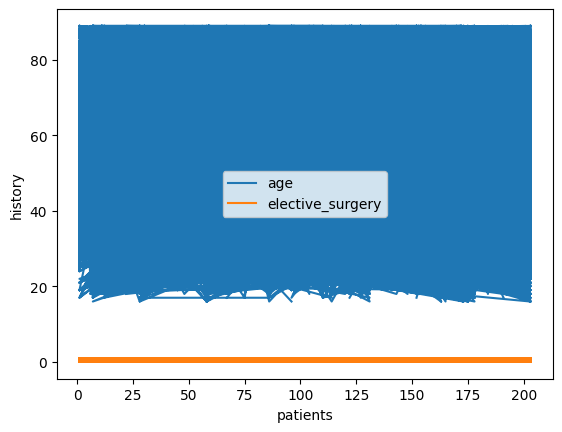

In [32]:
data = pd.read_csv('/content/drive/MyDrive/Data/unlabeled1.csv')
day_count = data['hospital_id']
gm = data['age']
ss = data['elective_surgery']
cc = data['apache_2_diagnosis']
rr = data['apache_3j_diagnosis']
mpt.plot(day_count,gm,label = 'age')
mpt.plot(day_count,ss,label = 'elective_surgery')
mpt.legend()
mpt.xlabel('patients')
mpt.ylabel('history')
mpt.show()

In [33]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'], dtype='object', length=150)

In [34]:
categorical_cols = [c for c in df.columns if(1<df[c].nunique()) & (df[c].dtype != np.number)&(df[c].dtype != int)]
categorical_cols

<ipython-input-34-c700c6506f6f>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  categorical_cols = [c for c in df.columns if(1<df[c].nunique()) & (df[c].dtype != np.number)&(df[c].dtype != int)]


['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

#Using LabelEncoder
using label encoder function to convert the data types to integers which are in the form of objects

In [35]:
le = LabelEncoder()
df['ethnicity'] = le.fit_transform(df['ethnicity'])
df['gender'] = le.fit_transform(df['gender'])
df['hospital_admit_source'] = le.fit_transform(df['hospital_admit_source'])
df['icu_admit_source'] = le.fit_transform(df['icu_admit_source'])
df['icu_stay_type'] = le.fit_transform(df['icu_stay_type'])
df['icu_type'] = le.fit_transform(df['icu_type'])

In [36]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.00,22.73,0,2,1,180.30,4,1,92,0,2,0.54,0,73.90,2.30,113.00,502.01,0,0.00,0.40,31.00,2.51,NaN,3.00,6.00,0.00,...,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,114252,59342,81,0,77.00,27.42,0,2,0,160.00,4,1,90,0,5,0.93,0,70.20,NaN,108.00,203.01,0,0.00,NaN,9.00,0.56,1.00,1.00,3.00,0.00,...,23.30,12.70,145.00,143.00,11.30,11.30,1.30,1.30,4.20,4.20,145.00,145.00,37.00,37.00,7.45,7.45,51.00,51.00,54.80,51.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,119783,50777,118,0,25.00,31.95,0,2,0,172.70,3,0,93,0,5,0.00,0,95.30,NaN,122.00,703.03,0,0.00,NaN,NaN,NaN,NaN,3.00,6.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,79267,46918,118,0,81.00,22.64,1,2,0,165.10,8,2,92,0,2,0.00,0,61.70,NaN,203.00,"1,206.03",1,0.00,NaN,NaN,NaN,0.60,4.00,6.00,0.00,...,9.00,8.00,NaN,NaN,11.60,11.60,1.60,1.10,NaN,NaN,NaN,NaN,37.00,27.00,7.44,7.34,337.00,102.00,342.50,236.67,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,92056,34377,33,0,19.00,NaN,0,2,1,188.00,15,0,91,0,5,0.07,0,NaN,NaN,119.00,601.01,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.00,23.06,0,2,1,177.80,0,1,927,0,3,0.30,0,72.90,NaN,113.00,501.06,0,0.00,NaN,NaN,NaN,NaN,4.00,6.00,0.00,...,5.68,5.68,208.00,208.00,13.20,13.20,1.10,1.10,4.20,4.20,140.00,140.00,48.00,48.00,7.34,7.34,144.00,144.00,NaN,NaN,0.12,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
91709,66119,13486,121,0,56.00,47.18,0,2,0,183.00,3,1,925,0,5,0.12,0,158.00,NaN,113.00,501.05,0,0.00,NaN,34.00,2.30,NaN,4.00,6.00,0.00,...,4.22,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.00,58.00,7.26,7.15,187.00,63.00,187.00,63.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
91710,8981,58179,195,0,48.00,27.24,0,2,1,170.20,3,0,908,0,5,0.05,0,78.90,2.90,123.00,702.01,0,0.00,NaN,33.00,2.30,NaN,3.00,6.00,0.00,...,17.55,17.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,14.90,7.36,6.93,136.00,60.00,NaN,NaN,0.05,0.02,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
91711,33776,120598,66,0,NaN,23.30,0,2,0,154.90,3,0,922,0,5,0.08,0,55.90,NaN,108.00,203.01,0,0.00,NaN,NaN,NaN,NaN,4.00,5.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.00,39.00,7.37,7.37,55.00,55.00,137.50,137.50,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Filling null values with mean

In [37]:
df=df.fillna(df.mean())
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.00,22.73,0,2,1,180.30,4,1,92,0,2,0.54,0,73.90,2.30,113.00,502.01,0,0.00,0.40,31.00,2.51,0.60,3.00,6.00,0.00,...,14.10,14.10,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,114252,59342,81,0,77.00,27.42,0,2,0,160.00,4,1,90,0,5,0.93,0,70.20,2.90,108.00,203.01,0,0.00,1.15,9.00,0.56,1.00,1.00,3.00,0.00,...,23.30,12.70,145.00,143.00,11.30,11.30,1.30,1.30,4.20,4.20,145.00,145.00,37.00,37.00,7.45,7.45,51.00,51.00,54.80,51.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,119783,50777,118,0,25.00,31.95,0,2,0,172.70,3,0,93,0,5,0.00,0,95.30,2.90,122.00,703.03,0,0.00,1.15,25.83,1.48,0.60,3.00,6.00,0.00,...,12.48,11.31,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,79267,46918,118,0,81.00,22.64,1,2,0,165.10,8,2,92,0,2,0.00,0,61.70,2.90,203.00,"1,206.03",1,0.00,1.15,25.83,1.48,0.60,4.00,6.00,0.00,...,9.00,8.00,167.99,159.22,11.60,11.60,1.60,1.10,4.20,4.15,138.24,137.90,37.00,27.00,7.44,7.34,337.00,102.00,342.50,236.67,0.04,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,92056,34377,33,0,19.00,29.19,0,2,1,188.00,15,0,91,0,5,0.07,0,84.03,2.90,119.00,601.01,0,0.00,1.15,25.83,1.48,0.60,3.47,5.47,0.01,...,12.48,11.31,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.09,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.00,23.06,0,2,1,177.80,0,1,927,0,3,0.30,0,72.90,2.90,113.00,501.06,0,0.00,1.15,25.83,1.48,0.60,4.00,6.00,0.00,...,5.68,5.68,208.00,208.00,13.20,13.20,1.10,1.10,4.20,4.20,140.00,140.00,48.00,48.00,7.34,7.34,144.00,144.00,285.67,223.52,0.12,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
91709,66119,13486,121,0,56.00,47.18,0,2,0,183.00,3,1,925,0,5,0.12,0,158.00,2.90,113.00,501.05,0,0.00,1.15,34.00,2.30,0.60,4.00,6.00,0.00,...,4.22,4.22,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,85.00,58.00,7.26,7.15,187.00,63.00,187.00,63.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
91710,8981,58179,195,0,48.00,27.24,0,2,1,170.20,3,0,908,0,5,0.05,0,78.90,2.90,123.00,702.01,0,0.00,1.15,33.00,2.30,0.60,3.00,6.00,0.00,...,17.55,17.55,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,20.00,14.90,7.36,6.93,136.00,60.00,285.67,223.52,0.05,0.02,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
91711,33776,120598,66,0,62.31,23.30,0,2,0,154.90,3,0,922,0,5,0.08,0,55.90,2.90,108.00,203.01,0,0.00,1.15,25.83,1.48,0.60,4.00,5.00,0.00,...,12.48,11.31,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,39.00,39.00,7.37,7.37,55.00,55.00,137.50,137.50,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
df.dtypes

encounter_id                     int64  
patient_id                       int64  
hospital_id                      int64  
hospital_death                   int64  
age                              float64
bmi                              float64
elective_surgery                 int64  
ethnicity                        int64  
gender                           int64  
height                           float64
hospital_admit_source            int64  
icu_admit_source                 int64  
icu_id                           int64  
icu_stay_type                    int64  
icu_type                         int64  
pre_icu_los_days                 float64
readmission_status               int64  
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            int64  
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [39]:
y = df.hospital_death
x = df.drop('hospital_death',axis = 1)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
print("shape of original dataset :", df.shape)
print("shape of input - training set",x_train.shape)
print("shape of output - testing set",y_test.shape)
print("shape of input - training set",x_train.shape)
print("shape of output - testing set",y_test.shape)


shape of original dataset : (91713, 150)
shape of input - training set (73370, 149)
shape of output - testing set (18343,)
shape of input - training set (73370, 149)
shape of output - testing set (18343,)


#Using xgbModel to get the accuracy

In [42]:
xgbModel = xgb.XGBClassifier()


In [43]:
s = xgbModel.fit(x_train,y_train)
s
print(xgbModel)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [44]:
predict=xgbModel.predict(x_test)

In [45]:
print(f'accuracy - : {xgbModel.score(x,y):f}')

accuracy - : 0.962394


#Using RandomForestclassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [47]:
y_predict = rf_clf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9273292264078941

In [49]:
result=rf_clf.predict_proba(x_test)
result


array([[0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [0.87, 0.13],
       [0.99, 0.01]])

In [50]:
t =result.reshape(36686,1)
k = []
for i in t:
  for j in i:
    k.append(j)


In [51]:
print(k)

[0.98, 0.02, 0.99, 0.01, 0.98, 0.02, 1.0, 0.0, 1.0, 0.0, 0.99, 0.01, 1.0, 0.0, 0.95, 0.05, 0.91, 0.09, 0.93, 0.07, 0.93, 0.07, 0.87, 0.13, 0.77, 0.23, 0.41, 0.59, 1.0, 0.0, 0.99, 0.01, 0.99, 0.01, 0.97, 0.03, 1.0, 0.0, 1.0, 0.0, 0.98, 0.02, 1.0, 0.0, 0.99, 0.01, 0.98, 0.02, 0.94, 0.06, 0.97, 0.03, 0.94, 0.06, 0.98, 0.02, 0.97, 0.03, 0.98, 0.02, 0.97, 0.03, 0.95, 0.05, 0.97, 0.03, 0.97, 0.03, 1.0, 0.0, 0.94, 0.06, 0.7, 0.3, 0.98, 0.02, 0.97, 0.03, 0.95, 0.05, 0.92, 0.08, 0.95, 0.05, 0.13, 0.87, 0.99, 0.01, 1.0, 0.0, 0.96, 0.04, 0.99, 0.01, 0.88, 0.12, 0.9, 0.1, 0.99, 0.01, 0.96, 0.04, 0.92, 0.08, 0.97, 0.03, 1.0, 0.0, 0.98, 0.02, 0.9, 0.1, 1.0, 0.0, 0.98, 0.02, 0.95, 0.05, 0.63, 0.37, 0.96, 0.04, 0.96, 0.04, 0.75, 0.25, 1.0, 0.0, 0.88, 0.12, 1.0, 0.0, 0.97, 0.03, 0.96, 0.04, 0.97, 0.03, 0.86, 0.14, 0.99, 0.01, 0.98, 0.02, 0.37, 0.63, 0.99, 0.01, 0.85, 0.15, 0.97, 0.03, 1.0, 0.0, 0.92, 0.08, 0.95, 0.05, 0.94, 0.06, 0.99, 0.01, 0.85, 0.15, 1.0, 0.0, 1.0, 0.0, 0.89, 0.11, 0.99, 0.01, 0.47,

In [52]:
t =result.reshape(36686,1)


t1 = []
t2 = []
for i in range(36686):
  if i % 2 != 0:
    t1.append(k[i]*100)
  else:
    t2.append(k[i]*100)



In [53]:

t1

[2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 5.0,
 9.0,
 7.000000000000001,
 7.000000000000001,
 13.0,
 23.0,
 59.0,
 0.0,
 1.0,
 1.0,
 3.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 2.0,
 6.0,
 3.0,
 6.0,
 2.0,
 3.0,
 2.0,
 3.0,
 5.0,
 3.0,
 3.0,
 0.0,
 6.0,
 30.0,
 2.0,
 3.0,
 5.0,
 8.0,
 5.0,
 87.0,
 1.0,
 0.0,
 4.0,
 1.0,
 12.0,
 10.0,
 1.0,
 4.0,
 8.0,
 3.0,
 0.0,
 2.0,
 10.0,
 0.0,
 2.0,
 5.0,
 37.0,
 4.0,
 4.0,
 25.0,
 0.0,
 12.0,
 0.0,
 3.0,
 4.0,
 3.0,
 14.000000000000002,
 1.0,
 2.0,
 63.0,
 1.0,
 15.0,
 3.0,
 0.0,
 8.0,
 5.0,
 6.0,
 1.0,
 15.0,
 0.0,
 0.0,
 11.0,
 1.0,
 53.0,
 2.0,
 3.0,
 0.0,
 0.0,
 7.000000000000001,
 0.0,
 0.0,
 48.0,
 0.0,
 0.0,
 27.0,
 7.000000000000001,
 2.0,
 3.0,
 3.0,
 5.0,
 41.0,
 4.0,
 1.0,
 3.0,
 0.0,
 30.0,
 4.0,
 0.0,
 9.0,
 3.0,
 1.0,
 15.0,
 2.0,
 0.0,
 1.0,
 25.0,
 3.0,
 36.0,
 19.0,
 20.0,
 0.0,
 17.0,
 15.0,
 5.0,
 4.0,
 25.0,
 26.0,
 3.0,
 1.0,
 6.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 1.0,
 9.0,
 2.0,
 1.0,
 0.0,
 0.0,
 6.0,
 6.0,
 3.0,
 33.0,
 4.0,
 4.0,

In [54]:
t2

[98.0,
 99.0,
 98.0,
 100.0,
 100.0,
 99.0,
 100.0,
 95.0,
 91.0,
 93.0,
 93.0,
 87.0,
 77.0,
 41.0,
 100.0,
 99.0,
 99.0,
 97.0,
 100.0,
 100.0,
 98.0,
 100.0,
 99.0,
 98.0,
 94.0,
 97.0,
 94.0,
 98.0,
 97.0,
 98.0,
 97.0,
 95.0,
 97.0,
 97.0,
 100.0,
 94.0,
 70.0,
 98.0,
 97.0,
 95.0,
 92.0,
 95.0,
 13.0,
 99.0,
 100.0,
 96.0,
 99.0,
 88.0,
 90.0,
 99.0,
 96.0,
 92.0,
 97.0,
 100.0,
 98.0,
 90.0,
 100.0,
 98.0,
 95.0,
 63.0,
 96.0,
 96.0,
 75.0,
 100.0,
 88.0,
 100.0,
 97.0,
 96.0,
 97.0,
 86.0,
 99.0,
 98.0,
 37.0,
 99.0,
 85.0,
 97.0,
 100.0,
 92.0,
 95.0,
 94.0,
 99.0,
 85.0,
 100.0,
 100.0,
 89.0,
 99.0,
 47.0,
 98.0,
 97.0,
 100.0,
 100.0,
 93.0,
 100.0,
 100.0,
 52.0,
 100.0,
 100.0,
 73.0,
 93.0,
 98.0,
 97.0,
 97.0,
 95.0,
 59.0,
 96.0,
 99.0,
 97.0,
 100.0,
 70.0,
 96.0,
 100.0,
 91.0,
 97.0,
 99.0,
 85.0,
 98.0,
 100.0,
 99.0,
 75.0,
 97.0,
 64.0,
 81.0,
 80.0,
 100.0,
 83.0,
 85.0,
 95.0,
 96.0,
 75.0,
 74.0,
 97.0,
 99.0,
 94.0,
 100.0,
 100.0,
 100.0,
 91.0,
 100.0,
 99.

#Inserting the predicted values in the testing data test

In [55]:
for i in range(0,18343):
   x_test['Survival Rate']=t2
   x_test['Death Rate']=t1
x_test



,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,...,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Survival Rate,Death Rate
90074,44446,58634,188,71.00,26.78,0,2,1,182.90,2,0,841,0,7,0.02,0,89.60,2.90,110.00,104.01,0,0.00,1.20,19.00,1.15,0.60,4.00,6.00,0.00,5.00,...,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.00,2.00
75178,7192,19433,157,65.00,54.26,1,2,0,165.10,15,2,697,0,7,0.32,0,147.90,3.60,202.00,"1,205.01",1,0.00,1.15,10.00,0.54,0.60,3.00,6.00,0.00,5.00,...,165.00,165.00,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,43.80,43.80,7.31,7.31,78.50,78.50,285.67,223.52,0.01,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,99.00,1.00
18729,25873,89578,44,89.00,19.97,0,2,1,179.00,3,0,388,0,5,0.07,0,64.00,2.90,301.00,410.01,0,0.00,1.15,25.83,1.48,0.60,3.00,6.00,0.00,4.00,...,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.09,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.00,2.00
85398,4316,34360,188,67.00,25.10,1,2,0,170.20,8,2,841,0,7,0.30,0,72.70,2.90,203.00,"1,206.03",1,0.00,1.00,10.00,0.59,0.60,4.00,6.00,0.00,5.00,...,154.00,154.00,8.60,8.60,1.60,1.48,3.80,3.70,137.00,135.00,52.00,52.00,7.39,7.32,128.00,128.00,285.67,223.52,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00
54943,12613,61103,194,57.00,33.75,0,0,1,185.00,3,0,607,0,3,0.24,0,115.50,2.90,112.00,107.01,0,0.00,1.15,25.83,1.48,0.60,4.00,6.00,0.00,5.00,...,167.99,159.22,11.19,11.04,1.60,1.48,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.02,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12832,39653,56101,174,72.00,37.06,0,2,0,157.50,2,0,212,0,3,0.01,0,91.94,3.40,117.00,106.01,0,0.00,0.60,26.00,0.93,0.60,4.00,6.00,0.00,5.00,...,226.00,226.00,9.10,9.10,1.50,1.50,4.40,4.40,139.00,139.00,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.09,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.00,3.00
64409,93348,63166,19,72.00,31.70,0,2,1,180.00,3,0,657,0,0,0.13,0,102.70,2.90,117.00,106.01,0,0.00,1.15,25.83,1.48,0.60,4.00,6.00,0.00,5.00,...,167.99,159.22,11.19,11.04,3.00,2.30,4.20,4.15,138.24,137.90,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.00,1.00
85253,104659,130248,35,75.00,26.49,0,2,1,167.60,15,0,895,0,5,0.03,0,74.40,3.40,110.00,104.01,0,0.00,0.40,24.00,1.34,0.60,4.00,6.00,0.00,5.00,...,211.00,186.00,11.19,11.04,1.60,1.48,4.80,4.80,140.00,140.00,45.25,38.43,7.39,7.32,165.91,103.51,285.67,223.52,0.04,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,99.00,1.00
45118,67701,41229,100,51.00,31.60,0,2,1,175.30,4,1,490,0,5,5.01,0,97.10,2.70,110.00,104.01,0,0.00,0.40,27.00,0.90,0.60,4.00,6.00,0.00,5.00,...,167.99,159.22,11.19,11.04,1.27,1.27,4.20,4.15,138.24,137.90,34.40,34.40,7.46,7.46,139.00,139.00,285.67,223.52,0.08,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,87.00,13.0

Deployment

In [56]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 

In [57]:
import pickle
import gradio as gr

In [58]:
pickle.dump(rf_clf,open('csv.sav','wb'))

In [59]:
model = pickle.load(open('csv.sav','rb'))

In [60]:
def predict_res(id):
  x = x_test.encounter_id.to_numpy()
  for i in range(len(x)):
    if(id == x[i]):
      index = i
      print(index)
  return t2[index]


 

  

In [61]:
title = "<u>Survival Rate Of Patients</u>"

In [62]:
outputs = gr.outputs.Textbox()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


#Final Result

In [63]:
gr.Interface(predict_res, inputs="number", outputs=outputs,title = title).launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://816762e871f1268b90.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
